In [1]:
print("Welcome")

Welcome


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("Data_Train.xlsx")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


->In our dataset except price remaining all are independent variables


->Only price is dependent variable

->from the data we can able to see all the independent variables are Object type


->Depenetent variable price in numerical data

In [5]:
# IN our first step we will do preprocessing

Replacing NULL Values

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we have only one record we null value we will remove that record

In [7]:
data.dropna(inplace=True)

No need the Attribute Route and Additioanl_info


So we will remove those Coloumns from the data set

In [8]:
data.drop(['Route',"Additional_Info"],axis=1,inplace=True)

now we had remove the null values records in our data
We had deleted record because we have only one record, if it is a numeric data we replace it mean or median or mode


And now, We will do anayalis the data

In [9]:
data['Journey_day']=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.day
data["Journey_month"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [10]:
data.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3


In [11]:
data['Journey_hour']=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Journey_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"],axis=1,inplace=True)

In [12]:
data.head(1)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_hour,Journey_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20


In [13]:
data['Arrival_hour']=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [14]:
data.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10


In [15]:
duration_time=list(data.Duration)
for i in range(len(duration_time)):
  if(len(duration_time[i].split()) == 1):
    if "h" in duration_time[i]:
      duration_time[i]=duration_time[i].strip()+" 0m"
    else:
      duration_time[i]="0h "+duration_time[i].strip()

In [16]:
duration_hours,duration_mins=[],[]
for i in  range(len(duration_time)):
  duration_hours.append(int(duration_time[i].split("h")[0]))
  duration_mins.append(int(duration_time[i].split()[1].split("m")[0]))
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True)

In [17]:
data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50


Now we will convert the categorical data to numbercal 
It can done in 3 ways
1. get_dummies method using numpy
2. LabelEncoding
3. OneHotEncoding
but we will use the LabelEncoding if data is in order or else if data is inorder then we can use OneHotEncoding

In [18]:
Airline=data.Airline
Airline=pd.get_dummies(Airline, drop_first= True)
Airline.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [19]:
Source=data.Source
Source=pd.get_dummies(Source,drop_first= True)
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [20]:
Destination=data.Destination
Destination=pd.get_dummies(Destination,drop_first= True)
Destination.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [21]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [22]:
data = pd.concat([data,Airline,Source,Destination],axis=1)
data.drop(['Airline',"Source","Destination"],axis=1,inplace=True)
data.head(1)

,Total_Stops,Price,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Now we will repeat same for data preprocessing for the testing too

In [23]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [24]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Here no null values we won't delete any data

In [25]:
test_data.drop(['Route',"Additional_Info"],axis=1,inplace=True)

In [26]:
test_data['Journey_day']=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)
test_data.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6


In [27]:
test_data['Journey_hour']=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Journey_minute"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace=True)
test_data.head(1)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month,Journey_hour,Journey_minute
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,6,6,17,30


In [28]:
test_data['Arrival_hour']=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)
test_data.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25


In [29]:
duration_time=list(test_data.Duration)
for i in range(len(duration_time)):
  if(len(duration_time[i].split()) == 1):
    if "h" in duration_time[i]:
      duration_time[i]=duration_time[i].strip()+" 0m"
    else:
      duration_time[i]="0h "+duration_time[i].strip()

In [30]:
duration_hours,duration_mins=[],[]
for i in  range(len(duration_time)):
  duration_hours.append(int(duration_time[i].split("h")[0]))
  duration_mins.append(int(duration_time[i].split()[1].split("m")[0]))
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)
test_data.head(1)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55


In [31]:
Airline=test_data.Airline
Airline=pd.get_dummies(Airline, drop_first= True)
Airline.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [32]:
Source=test_data.Source
Source=pd.get_dummies(Source,drop_first= True)
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0


In [33]:
Destination=test_data.Destination
Destination=pd.get_dummies(Destination,drop_first= True)
Destination.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [34]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:
test_data=pd.concat([test_data,Airline,Source,Destination],axis=1)
test_data.drop(['Airline',"Source","Destination"],axis=1,inplace=True)
test_data.head(1)

,Total_Stops,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Now we will Apply Ensembleing Algoithms to model the data

In [36]:
X=data.drop(["Price"],axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_hour,Journey_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
y=data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

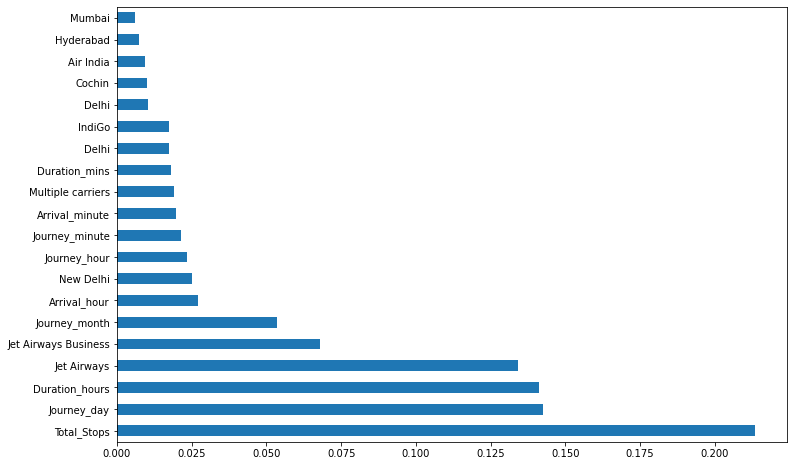

In [39]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
Regressor_model=RandomForestRegressor()
Regressor_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
y_pred = Regressor_model.predict(X_test)

In [43]:
Regressor_model.score(X_train, y_train)

0.9540881834730978

In [44]:
Regressor_model.score(X_test, y_test)

0.7965941320442999

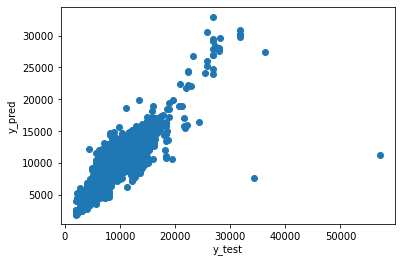

In [45]:
# Eroor
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [46]:
from sklearn import metrics
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

2094.24181543723

In [47]:
metrics.r2_score(y_test, y_pred)

0.7965941320442997

In [48]:
# we are storing the model in the file type pickel
import pickle
file = open('model.pkl', 'wb')
pickle.dump(Regressor_model, file)

In [50]:
model = open('model.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)

In [51]:
metrics.r2_score(y_test, y_prediction)

0.7965941320442997